In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read through data
data = pd.read_excel("Credit Card Payment Fraud.xlsx")

In [3]:
# overall EDA
print(data.columns)
print(data.head(10))
print(data.count)

Index(['recordnum', 'cardnum', 'date', 'merchnum', 'merch.description',
       'merch.state', 'merch.zip', 'transtype', 'amount', 'fraud'],
      dtype='object')
   recordnum     cardnum       date       merchnum       merch.description  \
0          1  5142190439 2010-01-01  5509006296254  FEDEX SHP 12/23/09 AB#   
1          2  5142190439 2010-01-01  5509006296254  FEDEX SHP 12/23/09 AB#   
2          3  5142190439 2010-01-01  5509006296254  FEDEX SHP 12/23/09 AB#   
3          4  5142152067 2010-01-01  5509006296254  FEDEX SHP 12/21/09 AB#   
4          5  5142132941 2010-01-01  5509006296254  FEDEX SHP 12/27/09 AB#   
5          6  5142259911 2010-01-01  5509006296254  FEDEX SHP 12/23/09 AB#   
6          7  5142190439 2010-01-01  5509006296254  FEDEX SHP 12/23/09 AB#   
7          8  5142148452 2010-01-01  5509006296254  FEDEX SHP 12/28/09 AB#   
8          9  5142190439 2010-01-01  5509006296254  FEDEX SHP 12/23/09 AB#   
9         10  5142146833 2010-01-01  5509006296254  FEDEX 

In [4]:
## recordnum clean-up
print(data[["recordnum"]].dtypes)
data[["recordnum"]] = data[["recordnum"]].astype('category')
print(data[["recordnum"]].dtypes)
print(data["recordnum"].unique())

recordnum    int64
dtype: object
recordnum    category
dtype: object
[1, 2, 3, 4, 5, ..., 95003, 95004, 95005, 95006, 95007]
Length: 95007
Categories (95007, int64): [1, 2, 3, 4, ..., 95004, 95005, 95006, 95007]


cardnum    int64
dtype: object
cardnum    category
dtype: object
cardnum    0
dtype: int64
count    1634.000000
mean       58.143819
std        84.327748
min         1.000000
25%        10.000000
50%        30.000000
75%        72.000000
max      1192.000000
Name: recordnum, dtype: float64


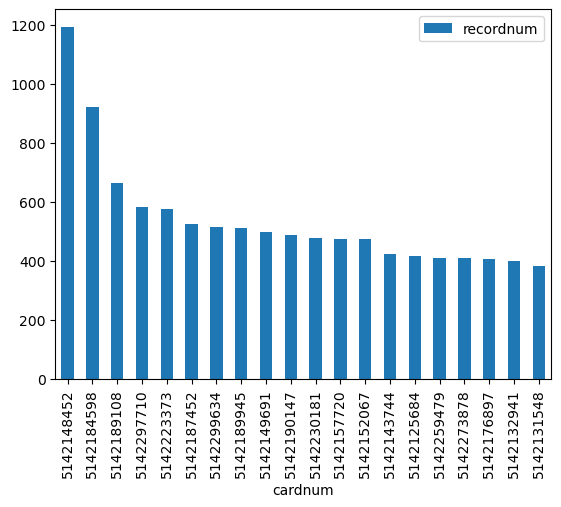

In [5]:
## cardnum clean-up
print(data[["cardnum"]].dtypes)
data[["cardnum"]] = data[["cardnum"]].astype('category')
print(data[["cardnum"]].dtypes)

print(data[["cardnum"]].isnull().sum())

cardnum = pd.DataFrame(data.groupby("cardnum")["recordnum"].count())
print(cardnum["recordnum"].describe())

cardnum = cardnum.sort_values(by="recordnum", ascending=False)
cardnum_viz=cardnum.head(20).reset_index()
cardnum_viz.plot(kind='bar',x='cardnum', y="recordnum")
plt.show()

date    datetime64[ns]
dtype: object
date    0
dtype: int64
date   2010-01-01
dtype: datetime64[ns]
date   2010-12-31
dtype: datetime64[ns]


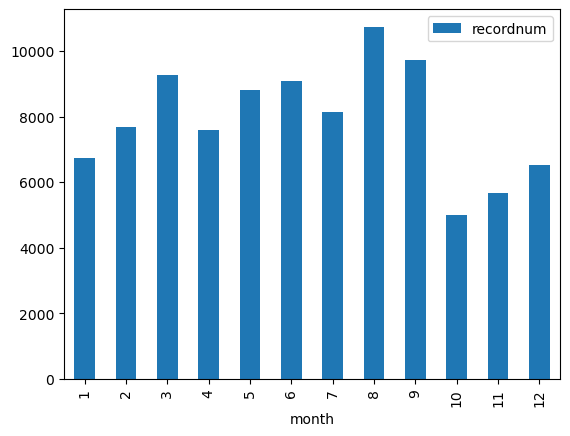

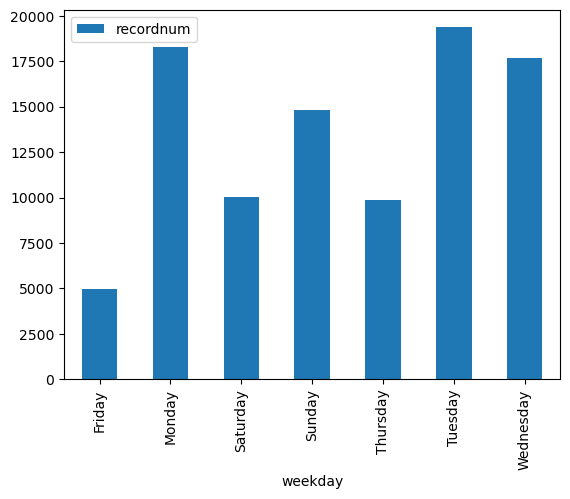

In [6]:
## date clean-up *
print(data[["date"]].dtypes)
print(data[["date"]].isnull().sum())

date = pd.DataFrame(data.groupby("date")["recordnum"].count())
date = date.sort_values(by="recordnum", ascending=False).reset_index()
print(date[["date"]].min())
print(date[["date"]].max())

date["month"]=date["date"].dt.month
date["weekday"]=date["date"].dt.day_name()

month=pd.DataFrame(date.groupby("month")["recordnum"].sum()).reset_index()
weekday=pd.DataFrame(date.groupby("weekday")["recordnum"].sum()).reset_index()

month.plot(kind='bar',x='month', y="recordnum")
plt.show()
weekday.plot(kind='bar',x='weekday', y="recordnum")
plt.show()

merchnum    object
dtype: object
merchnum    category
dtype: object
merchnum    3227
dtype: int64
count    13087.000000
mean         7.013066
std         89.040135
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       9157.000000
Name: recordnum, dtype: float64


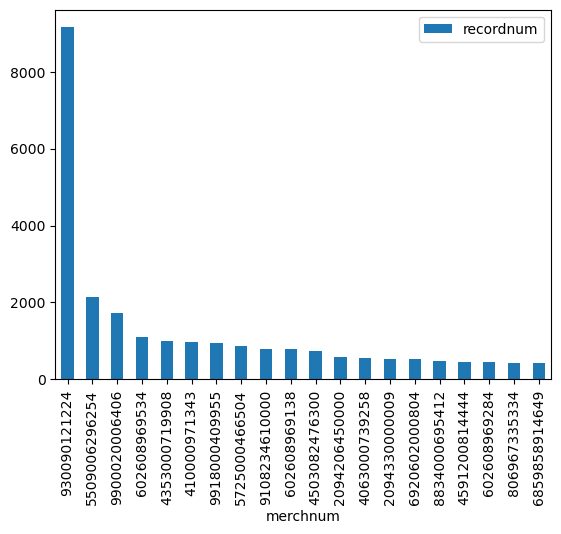

In [7]:
## merchnum clean-up *
print(data[["merchnum"]].dtypes)
data[["merchnum"]] = data[["merchnum"]].astype('category')
print(data[["merchnum"]].dtypes)

print(data[["merchnum"]].isnull().sum())

merchnum = pd.DataFrame(data.groupby("merchnum")["recordnum"].count())
print(merchnum['recordnum'].describe())

merchnum = merchnum.sort_values(by="recordnum", ascending=False)
merchnum_viz=merchnum.head(20).reset_index()
merchnum_viz.plot(kind='bar',x='merchnum', y="recordnum")
plt.show()


merch.description    object
dtype: object
merch.description    category
dtype: object
merch.description    0
dtype: int64
count    12964.000000
mean         7.328525
std         38.214240
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1687.000000
Name: recordnum, dtype: float64


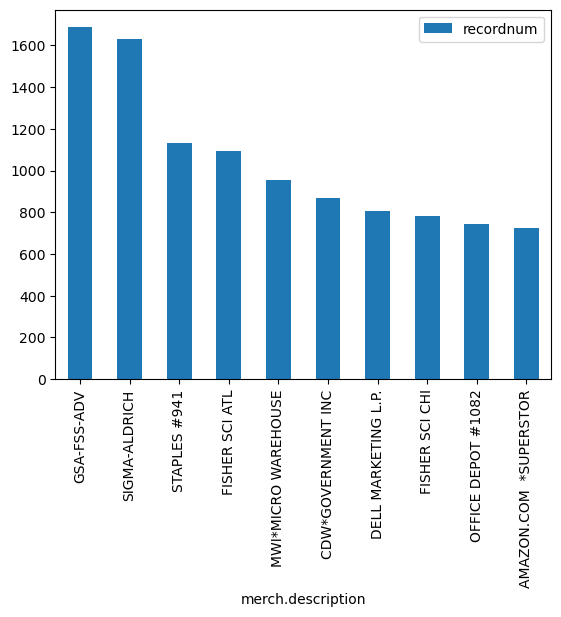

In [8]:
# merch.description clean-up
print(data[["merch.description"]].dtypes)
data[["merch.description"]] = data[["merch.description"]].astype('category')
print(data[["merch.description"]].dtypes)

print(data[["merch.description"]].isnull().sum())

merchdes = pd.DataFrame(data.groupby("merch.description")["recordnum"].count())

print(merchdes["recordnum"].describe())

merchdes = merchdes.sort_values(by="recordnum", ascending=False)
merchdes_viz=merchdes.head(10).reset_index()
merchdes_viz.plot(kind='bar',x='merch.description', y="recordnum")
plt.show()

merch.zip    float64
dtype: object
merch.zip    category
dtype: object
merch.zip    4363
dtype: int64
count     4574.000000
mean        19.817228
std        185.967404
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max      11669.000000
Name: recordnum, dtype: float64


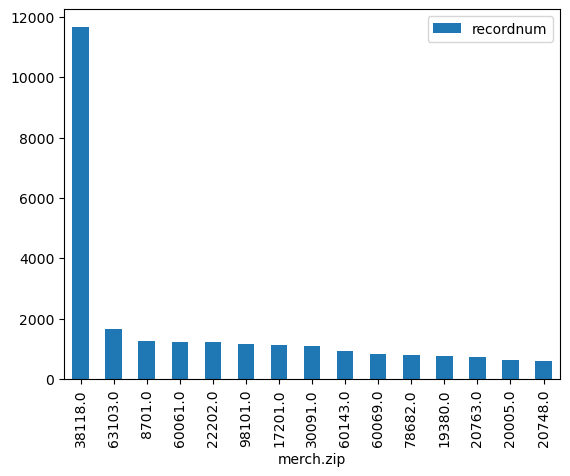

In [9]:
# merch.zip clean-up
print(data[["merch.zip"]].dtypes)
data[["merch.zip"]] = data[["merch.zip"]].astype('category')
print(data[["merch.zip"]].dtypes)

print(data[["merch.zip"]].isnull().sum())

merchzip = pd.DataFrame(data.groupby("merch.zip")["recordnum"].count())

print(merchzip["recordnum"].describe())

merchzip = merchzip.sort_values(by="recordnum", ascending=False)
merchzip_viz=merchzip.head(15).reset_index()
merchzip_viz.plot(kind='bar',x='merch.zip', y="recordnum")
plt.show()


merch.state    object
dtype: object
merch.state    category
dtype: object
merch.state    1017
dtype: int64
count       58.000000
mean      1620.517241
std       2361.398019
min          3.000000
25%        130.250000
50%        438.500000
75%       2323.750000
max      11834.000000
Name: recordnum, dtype: float64


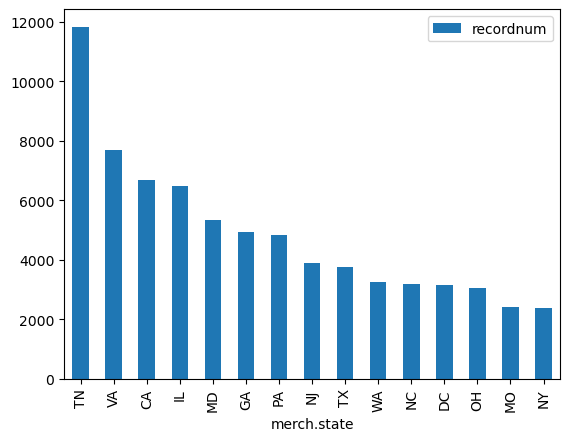

In [10]:
# merch.state clean-up
print(data[["merch.state"]].dtypes)
data[["merch.state"]] = data[["merch.state"]].astype('category')
print(data[["merch.state"]].dtypes)

print(data[["merch.state"]].isnull().sum())

merchstate = pd.DataFrame(data.groupby("merch.state")["recordnum"].count())

print(merchstate["recordnum"].describe())

merchstate = merchstate.sort_values(by="recordnum", ascending=False)
merchstate_viz=merchstate.head(15).reset_index()
merchstate_viz.plot(kind='bar',x='merch.state', y="recordnum")
plt.show()


In [11]:
# transtype clean-up
print(data[["transtype"]].dtypes)
data[["transtype"]] = data[["transtype"]].astype('category')
print(data[["transtype"]].dtypes)


print(data["transtype"].unique())
print(data[["transtype"]].isnull().sum())


transtype    object
dtype: object
transtype    category
dtype: object
['P']
Categories (1, object): ['P']
transtype    0
dtype: int64


amount    float64
dtype: object
amount    0
dtype: int64
count    95007.000000
mean       380.966717
std        758.828597
min          0.010000
25%         33.245000
50%        136.460000
75%        420.850000
max      47900.000000
Name: amount, dtype: float64


(array([24108., 10152.,  7995.,  5406.,  4695.,  3967.,  3098.,  2836.,
         2715.,  2059.,  2065.,  1837.,  1384.,  1381.,  1433.,  1206.,
          979.,   985.,   845.,   741.,   777.,   604.,   555.,   620.,
          503.,   459.,   496.,   442.,   482.,   423.,   359.,   313.,
          277.,   289.,   345.,   269.,   255.,   315.,   252.,   200.,
          273.,   191.,   216.,   270.,   198.,   182.,   251.,   177.,
          170.,   206.]),
 array([1.000000e-02, 3.443600e+01, 6.886200e+01, 1.032880e+02,
        1.377140e+02, 1.721400e+02, 2.065660e+02, 2.409920e+02,
        2.754180e+02, 3.098440e+02, 3.442700e+02, 3.786960e+02,
        4.131220e+02, 4.475480e+02, 4.819740e+02, 5.164000e+02,
        5.508260e+02, 5.852520e+02, 6.196780e+02, 6.541040e+02,
        6.885300e+02, 7.229560e+02, 7.573820e+02, 7.918080e+02,
        8.262340e+02, 8.606600e+02, 8.950860e+02, 9.295120e+02,
        9.639380e+02, 9.983640e+02, 1.032790e+03, 1.067216e+03,
        1.101642e+03, 1.136068

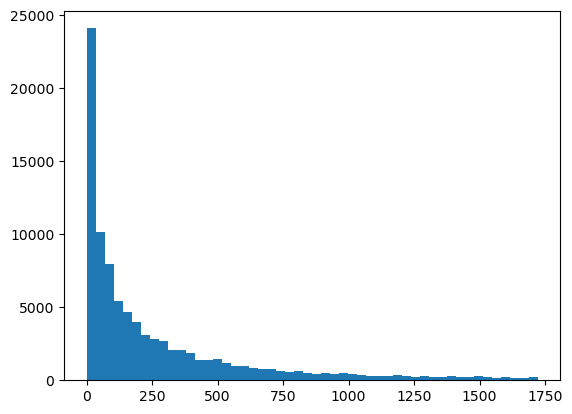

In [12]:
## amount clean-up *
print(data[["amount"]].dtypes)
print(data[["amount"]].isnull().sum())

amount = data[["amount"]]
amount_uni=amount["amount"].unique()
print(amount["amount"].describe())
amount = pd.DataFrame(amount.sort_values(by="amount"))
amount["percentile"]=amount["amount"].rank(pct=True)

amount_viz=amount.loc[amount["percentile"]<=0.95,]
plt.hist(amount_viz["amount"],bins=50)

In [13]:
## fraud clean-up *
print(data[["fraud"]].dtypes)
data[["fraud"]] = data[["fraud"]].astype('category')
print(data[["fraud"]].dtypes)
print(data[["fraud"]].isnull().sum())
fraud = pd.DataFrame(data.groupby("fraud")["recordnum"].count()).reset_index()
fraud["total"]=95007
fraud["percentage"]=100*fraud["recordnum"]/fraud["total"]
print(fraud["percentage"])

fraud    int64
dtype: object
fraud    category
dtype: object
fraud    0
dtype: int64
0    99.686339
1     0.313661
Name: percentage, dtype: float64
